## Importing python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## reading the aerofit csv file into a dataframe df

In [2]:
df = pd.read_csv("/Users/enercent/Desktop/aerofit_treadmill.csv")

In [3]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


## Defining Problem Statement and Analysing basic metrics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [6]:
df.shape

(180, 9)

Observations:
* there are 3 unique products out of which KP281 has appeared most
* The average age of customers who bought a threadmil was found be about 28
* More number of male has purchased when compared to female
* Usually the customers who already have a partner tend to buy a threadmil more than single people
by looking at the standard deviation we can see that both income and miles look like they have more variance

Problem statement: Going forward with this analysis would be interested in findings wherein what type of product is preferred by what aged peope belonging to which gender and are they single or partnered and also considering few measures as caclulations of education, usage, miles and income

### Now checking unique values for all the categorical values

* Unique Products with their value counts

In [7]:
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [8]:
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

* Unique Gender with their value counts

In [9]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
df["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

* Unique Marital Status with their value counts

In [11]:
df["MaritalStatus"].unique()

array(['Single', 'Partnered'], dtype=object)

In [12]:
df["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

## Visual Analysis - Univariate & Bivariate

## For continuous variable

In [13]:
numerical = ["Age","Education", "Usage", "Fitness", "Income", "Miles"]

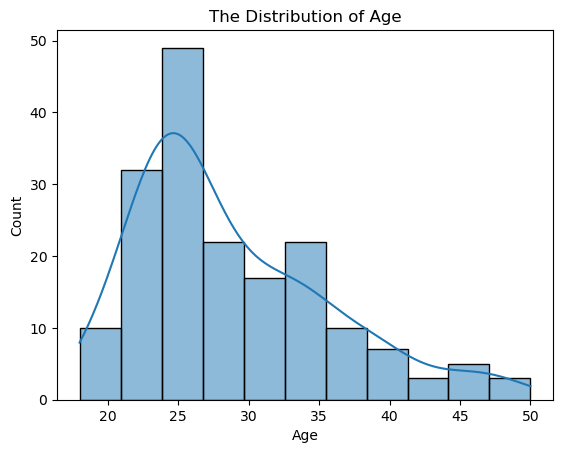

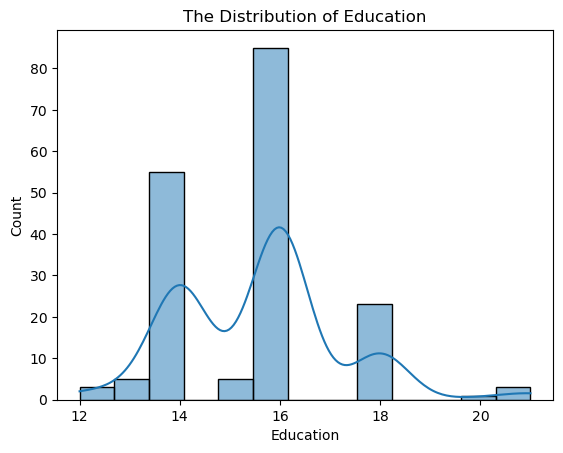

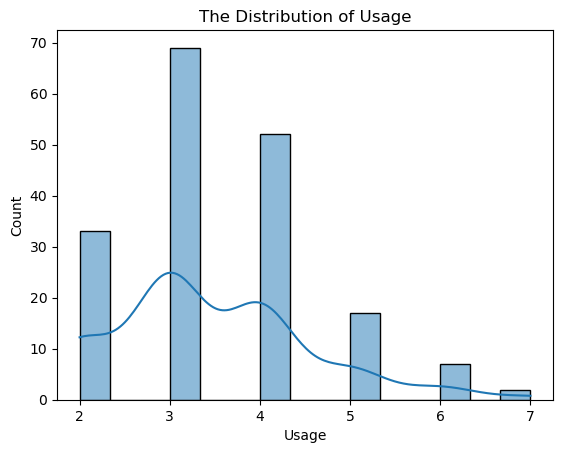

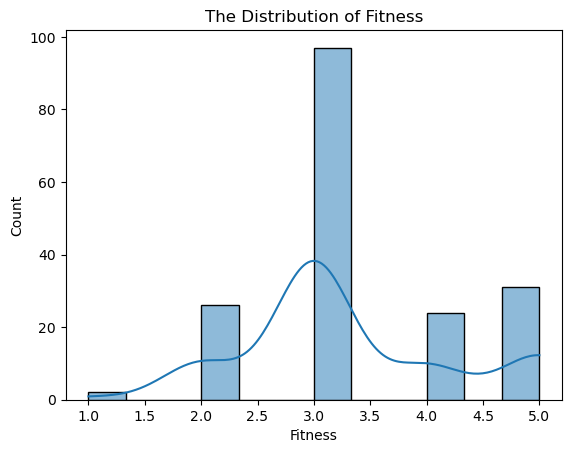

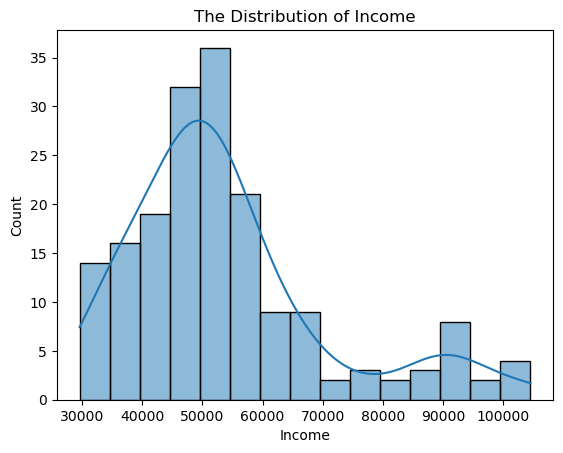

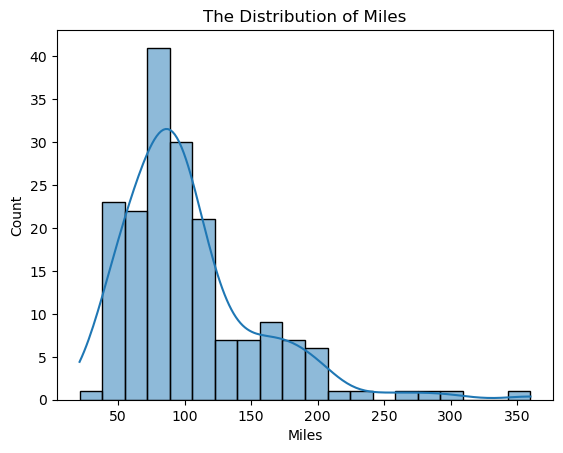

In [14]:
for num_col in numerical:
    plt.figure()
    sns.histplot(df[num_col], kde=True)
    plt.title(f"The Distribution of {num_col}")
    plt.show()

* The KP281 is an entry-level treadmill that sells for 1,500 dollars.
* The KP481 is for mid-level runners that sell for 1,750 dollars.
* The KP781 treadmill is having advanced features that sell for 2,500 dollars.

In [15]:
def func(x):
    if x["Product"] == "KP281":
        return "cheap"
    elif x["Product"] == "KP481":
        return "medium"
    elif x["Product"] == "KP781":
        return "high"
    else:
        return 0

In [16]:
df["Product_Price"] = df.apply(func, axis=1)

In [17]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_Price
0,KP281,18,Male,14,Single,3,4,29562,112,cheap
1,KP281,19,Male,15,Single,2,3,31836,75,cheap
2,KP281,19,Female,14,Partnered,4,3,30699,66,cheap
3,KP281,19,Male,12,Single,3,3,32973,85,cheap
4,KP281,20,Male,13,Partnered,4,2,35247,47,cheap


## For categorical variable

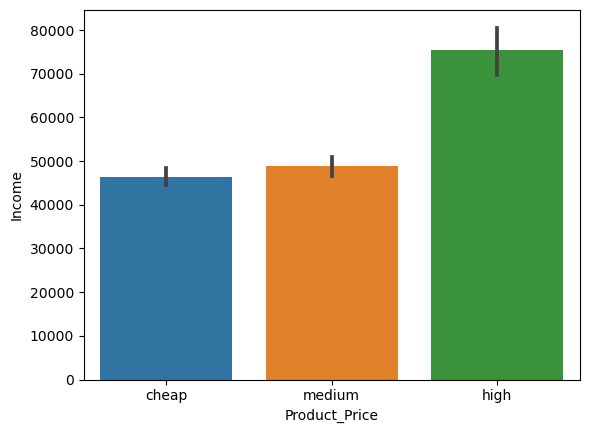

In [18]:
sns.barplot(data=df, x = "Product_Price", y="Income")
plt.show()

Looks like people with buy products based on their income

<AxesSubplot:xlabel='Product', ylabel='count'>

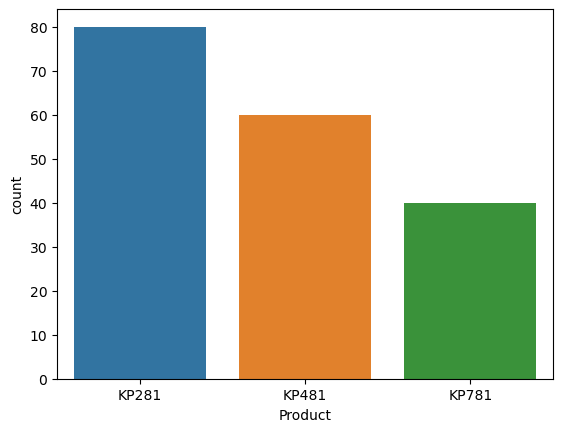

In [19]:
sns.countplot(data=df, x="Product")

Text(0.5, 1.0, 'Number of products sold vs gender')

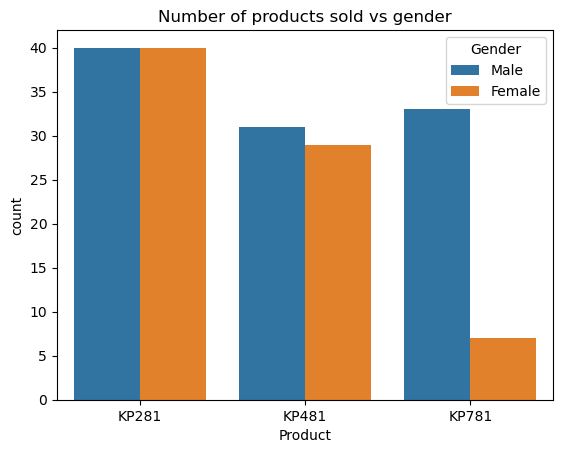

In [20]:
sns.countplot(data=df, x="Product", hue="Gender")
plt.title("Number of products sold vs gender")

* Product vs Gender: 
    * Equal number of male and female have purchased KP281 which is the basic model
    * Little less female when compared to male has purchased the medium model KP481
    * very few female and higher majority of male has purchased the expensive model KP781

Text(0.5, 1.0, 'Number of products sold vs marital status')

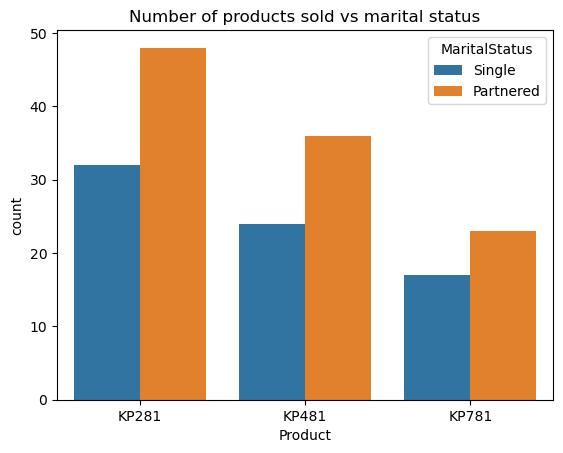

In [21]:
sns.countplot(data=df, x="Product", hue="MaritalStatus")
plt.title("Number of products sold vs marital status")

* Product vs Marital Status:
    * We can see that ideally in all scenarios the partnered people have purchased more models than singles irrespective of which model
    * Also we can see that as the model price increases the product purchase has gone down (KP281 being most, KP481 being second and KP781 being least bought)

In [22]:
df["Product_Price"].unique()

array(['cheap', 'medium', 'high'], dtype=object)

Classifying Income as low, medium and high for analysis

In [23]:
df["Income"].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [24]:
df["Income"].describe()[["25%","50%", "75%"]]

25%    44058.75
50%    50596.50
75%    58668.00
Name: Income, dtype: float64

In [25]:
quartiles = df["Income"].describe()[["25%","50%", "75%"]]

In [26]:
low_threshold = quartiles["25%"]
high_threshold = quartiles["75%"]

In [27]:
df["Income_Range"] = pd.cut(df["Income"], bins=[float("-inf"), low_threshold, high_threshold, float("inf")],
                        labels=["Low", "Medium", "High"], right=False)

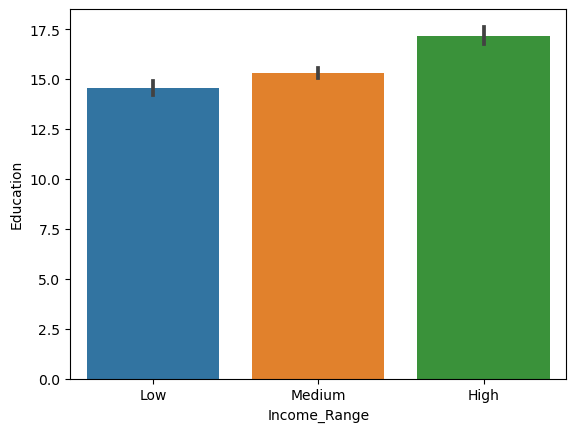

In [28]:
sns.barplot(data=df, x = "Income_Range", y="Education")
plt.show()

* Can also be seen that people who are more educated has an higher income

<AxesSubplot:xlabel='Income_Range', ylabel='count'>

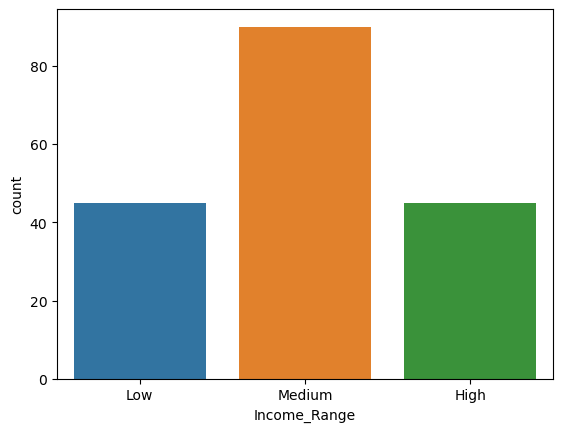

In [29]:
sns.countplot(data=df, x="Income_Range")

#### Observation
* People who have had the medium range of income has bought the highest number of products 
* the people belonging to both low and high have equally bought the product

<AxesSubplot:xlabel='Income_Range', ylabel='count'>

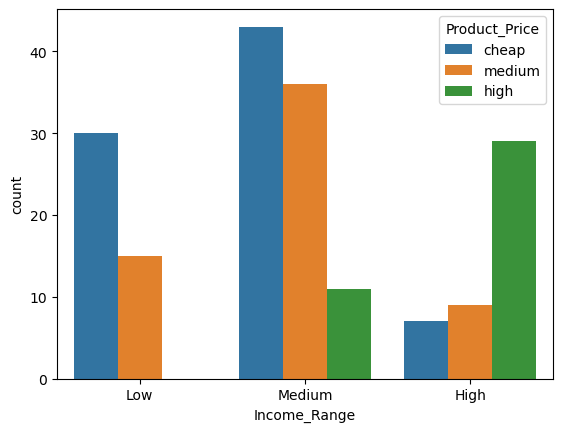

In [34]:
sns.countplot(data=df, x="Income_Range", hue="Product_Price")

#### Observation
* None of the low income people has bought the higher priced product
* The medium income people have bought high number of cheap product followed by medium and then at last comes high with very few numbers
* The people belonging to the high income has got the highest number of high or expensive product followed by a few medium priced products followed by very few cheap product

<AxesSubplot:xlabel='Income_Range', ylabel='count'>

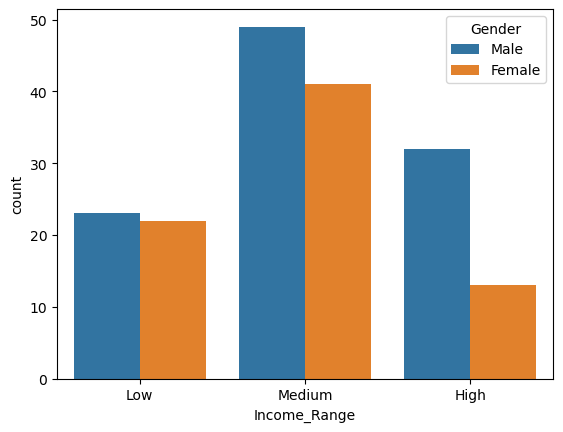

In [31]:
sns.countplot(data=df, x="Income_Range", hue="Gender")

#### Irrespective of what income range people belonged to, male bought higher products than female and when it comes to higher priced products it was seen that male significantly bought higher products than female

## For correlation

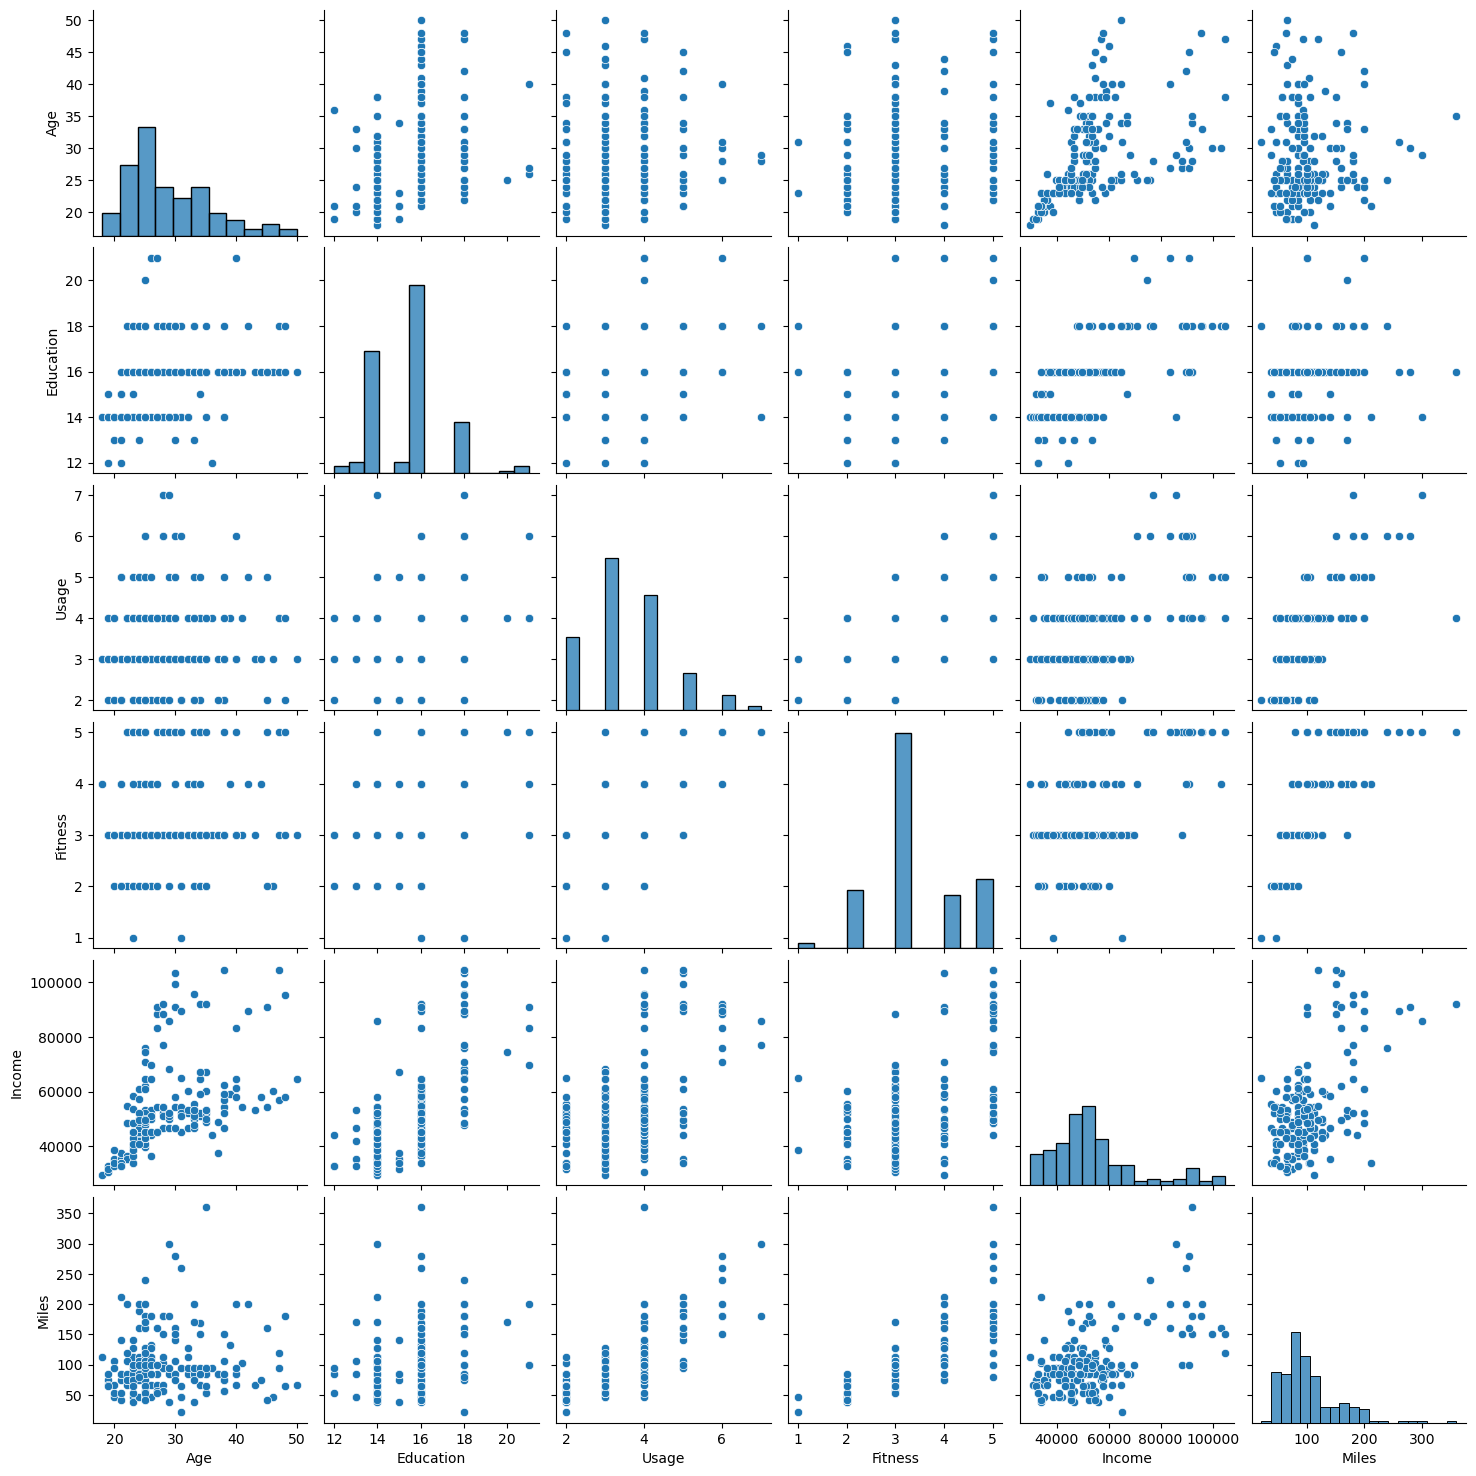

In [98]:
sns.pairplot(df)

<AxesSubplot:xlabel='Age', ylabel='Miles'>

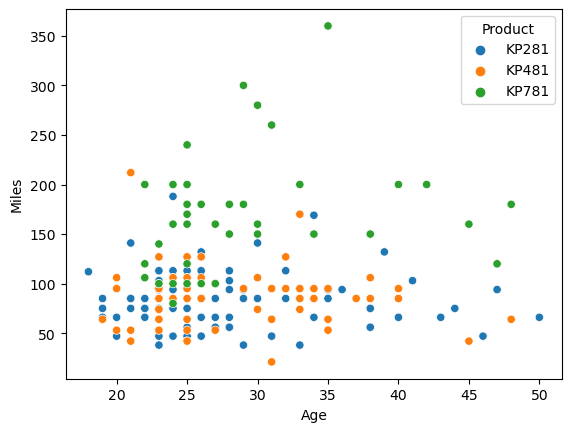

In [95]:
sns.scatterplot(data=df, x="Age", y="Miles", hue="Product")

<AxesSubplot:xlabel='Age', ylabel='Income'>

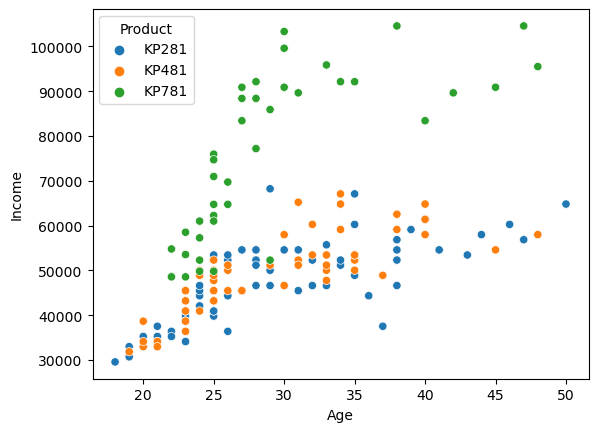

In [96]:
sns.scatterplot(data=df, x="Age", y="Income", hue="Product")

<AxesSubplot:>

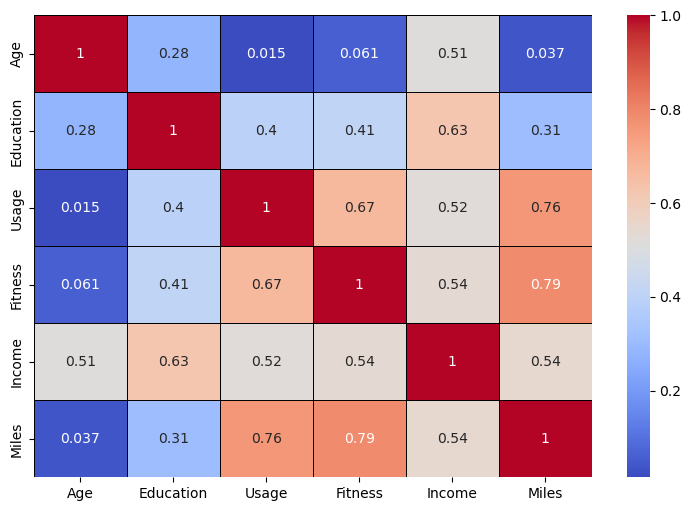

In [33]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,linecolor='black',linewidth=0.65)

#### Observations:
   * we can see how all the numerical columns or fields are correlated to eachother
   * can be seen that income and education are highly correlated as people who are educated more tend to earn more 
   * can also be seen that all of fitness, usage and miles are very strongly correlated fields as it is quite obvious
   that as more miles they run more usage of threadmil and infering that they'll end up being fit
   * can also be observed that nothing correlates that well with age apart from income, kind of also makes sense as people with higher age or experience has higher income

## Detecting Outliers

* Boxplot distribution for all the numerical columns in the dataframe

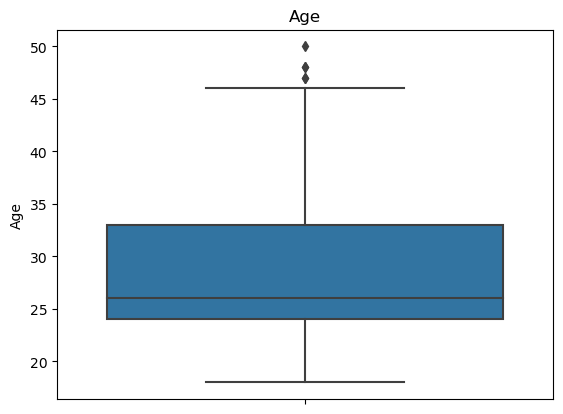

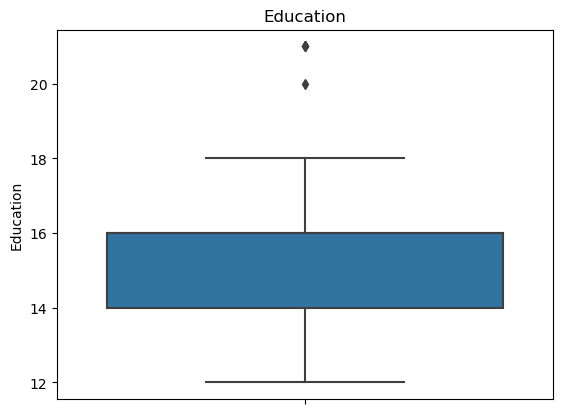

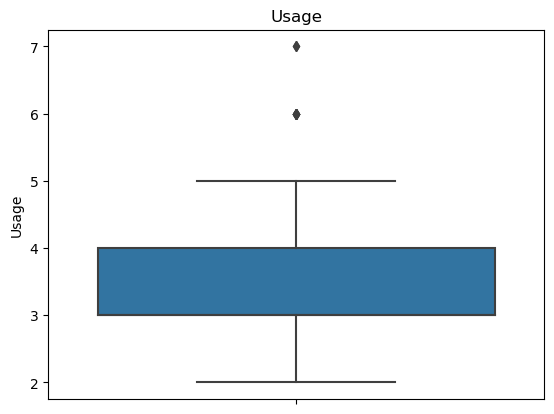

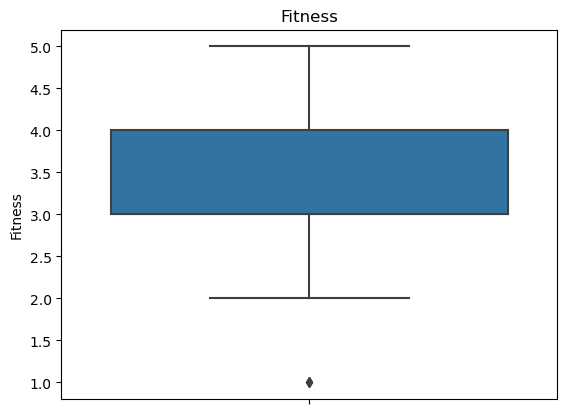

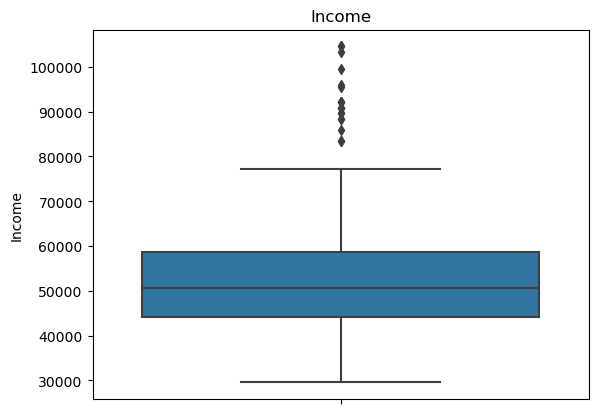

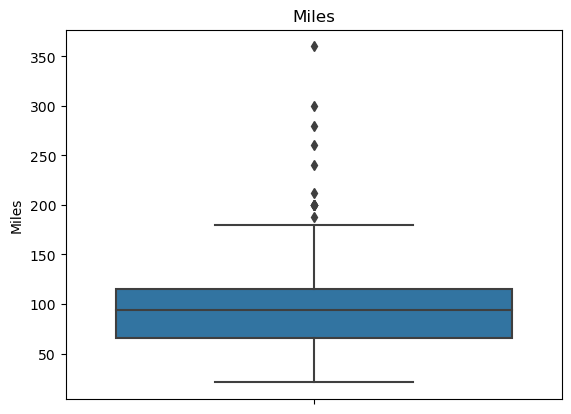

In [68]:
for i in numerical:
    plt.figure()
    sns.boxplot(y=df[i])
    plt.title(i)

#### Observation:
* We can see that there are a lot of outliers for both Miles and Income field which can be seen by the points that fall out of the whiskers

<AxesSubplot:xlabel='Product', ylabel='Miles'>

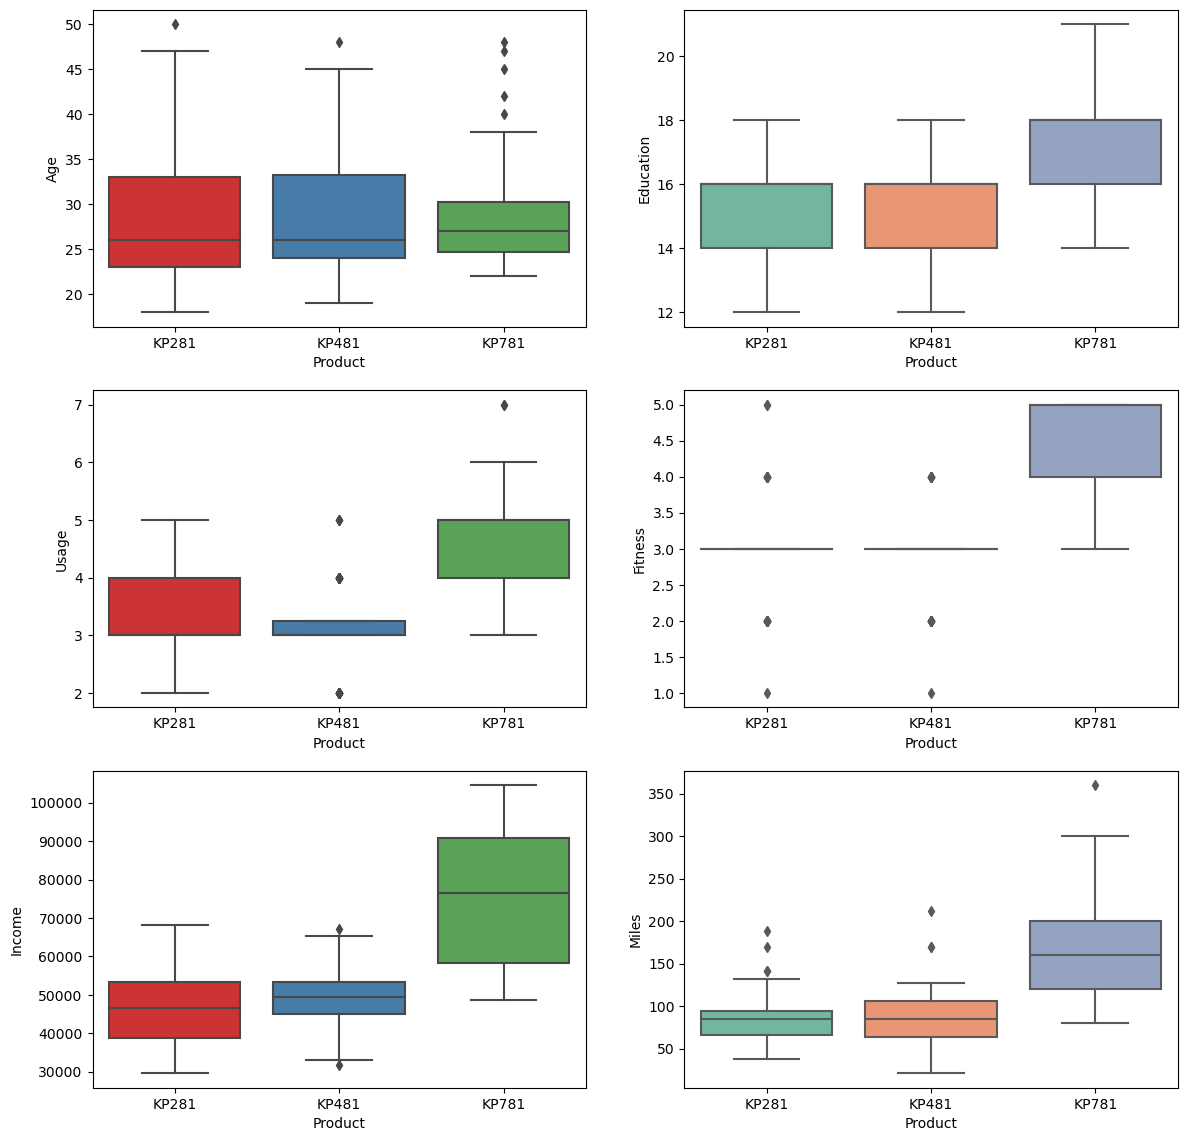

In [124]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))

sns.boxplot(x='Product', y="Age", data=df, ax = axis[0,0], palette='Set1')
sns.boxplot(x='Product', y="Education", data=df, ax = axis[0,1], palette='Set2')
sns.boxplot(x='Product', y="Usage", data=df, ax = axis[1,0], palette='Set1')
sns.boxplot(x='Product', y="Fitness", data=df, ax = axis[1,1], palette='Set2')
sns.boxplot(x='Product', y="Income", data=df, ax = axis[2,0], palette='Set1')
sns.boxplot(x='Product', y="Miles", data=df, ax = axis[2,1], palette='Set2')

## Conditional Probablity and Marginal Probablity

In [99]:
product_names = ["KP281", "KP481", "KP781"]

In [100]:
for product in product_names:
    product_df = df[df['Product'] == product]
    
    # Create a two-way contingency table for Gender and MaritalStatus
    gender_marital_table = pd.crosstab(product_df['Gender'], product_df['MaritalStatus'])
    
    # Compute conditional probabilities
    conditional_probs = gender_marital_table.div(gender_marital_table.sum(axis=1), axis=0)
    
    # Compute marginal probabilities
    gender_marginal_probs = gender_marital_table.sum(axis=0) / gender_marital_table.sum().sum()
    marital_marginal_probs = gender_marital_table.sum(axis=1) / gender_marital_table.sum().sum()
    
    print(f"Contingency Table for {product}:")
    print(gender_marital_table)
    print("\nConditional Probabilities:")
    print(conditional_probs)
    print("\nMarginal Probabilities for Gender:")
    print(gender_marginal_probs)
    print("\nMarginal Probabilities for MaritalStatus:")
    print(marital_marginal_probs)
    print("=====================================\n")

Contingency Table for KP281:
MaritalStatus  Partnered  Single
Gender                          
Female                27      13
Male                  21      19

Conditional Probabilities:
MaritalStatus  Partnered  Single
Gender                          
Female             0.675   0.325
Male               0.525   0.475

Marginal Probabilities for Gender:
MaritalStatus
Partnered    0.6
Single       0.4
dtype: float64

Marginal Probabilities for MaritalStatus:
Gender
Female    0.5
Male      0.5
dtype: float64

Contingency Table for KP481:
MaritalStatus  Partnered  Single
Gender                          
Female                15      14
Male                  21      10

Conditional Probabilities:
MaritalStatus  Partnered    Single
Gender                            
Female          0.517241  0.482759
Male            0.677419  0.322581

Marginal Probabilities for Gender:
MaritalStatus
Partnered    0.6
Single       0.4
dtype: float64

Marginal Probabilities for MaritalStatus:
Gender
Female  

## Business Insights based on Non-Graphical and Visual Analysis 

* Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)

In [102]:
crosstab = pd.crosstab(index=df['Product'], columns='count', normalize='columns').reset_index()

In [103]:
crosstab

col_0,Product,count
0,KP281,0.444444
1,KP481,0.333333
2,KP781,0.222222


In [104]:
crosstab["count"]*100 

0    44.444444
1    33.333333
2    22.222222
Name: count, dtype: float64

<AxesSubplot:ylabel='count'>

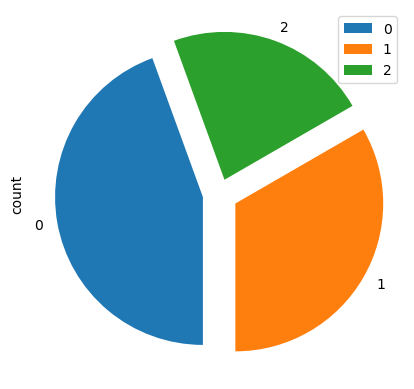

In [105]:
crosstab.plot(kind="pie", y="count", explode={0.112,.104,.126}, startangle=110)

In [110]:
pd.crosstab(index=df['Product'], columns='count', normalize='columns')

col_0,count
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


In [111]:
pd.crosstab(index=df['Gender'], columns='count', normalize='columns')

col_0,count
Gender,
Female,0.422222
Male,0.577778


In [113]:
pd.crosstab(index=df['MaritalStatus'], columns='count', normalize='columns')

col_0,count
MaritalStatus,
Partnered,0.594444
Single,0.405556


### Observations:
   * KP281 was bought by 44% of the customers and KP481 was bought by 33% and KP781 being the most expensive was bought by 22%
   * 58% of male customers bought the product and 42% of female customers
   * 59%  of customers who bought the product had a partner and 41% were single

<AxesSubplot:xlabel='Product', ylabel='Miles'>

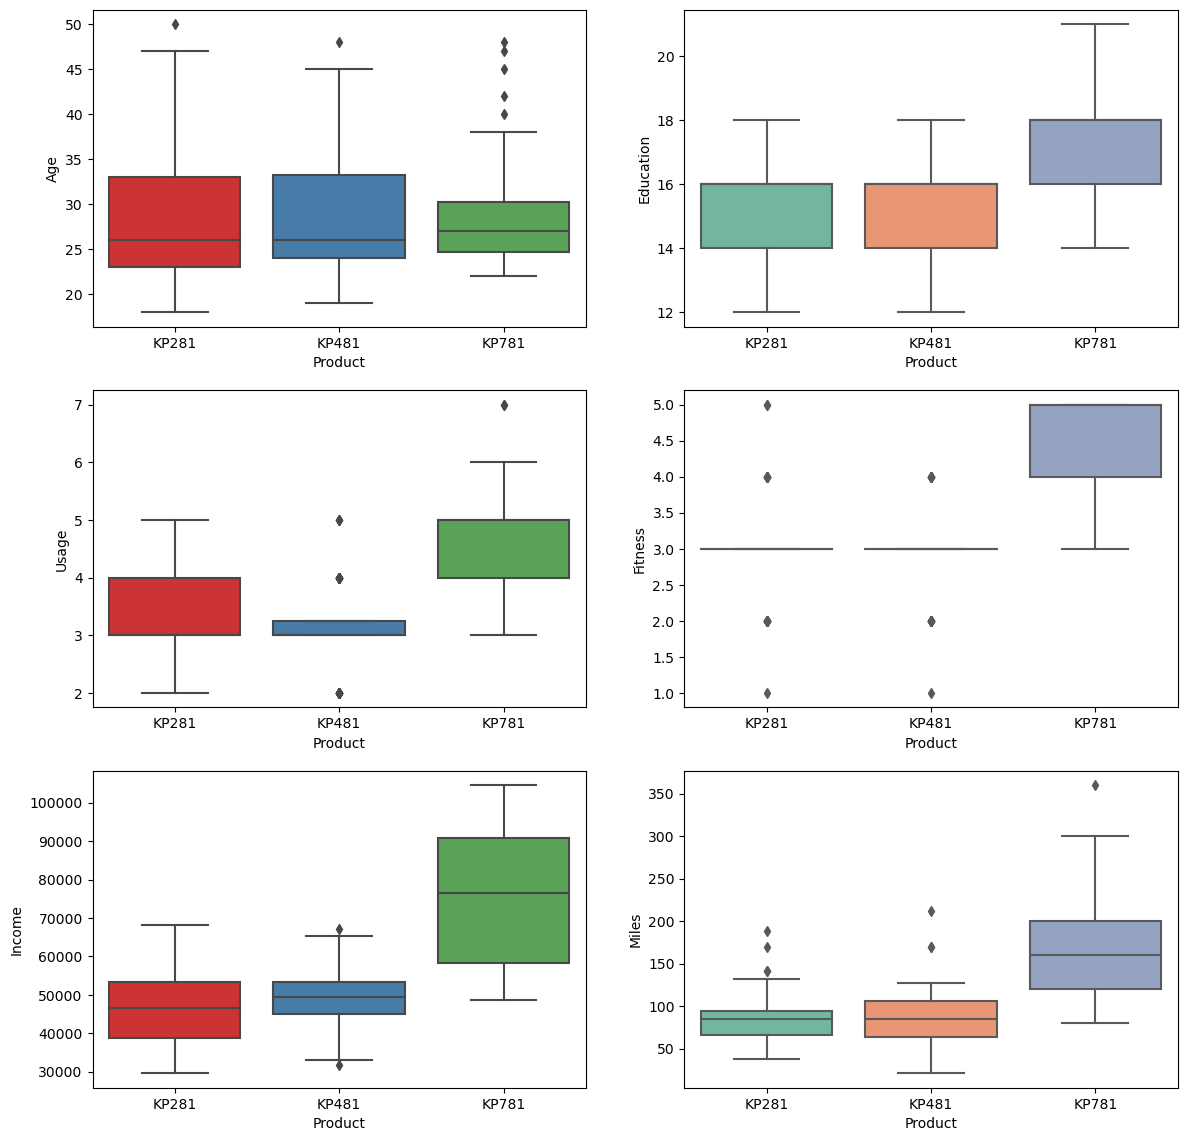

In [128]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))

sns.boxplot(x='Product', y="Age", data=df, ax = axis[0,0], palette='Set1')
sns.boxplot(x='Product', y="Education", data=df, ax = axis[0,1], palette='Set2')
sns.boxplot(x='Product', y="Usage", data=df, ax = axis[1,0], palette='Set1')
sns.boxplot(x='Product', y="Fitness", data=df, ax = axis[1,1], palette='Set2')
sns.boxplot(x='Product', y="Income", data=df, ax = axis[2,0], palette='Set1')
sns.boxplot(x='Product', y="Miles", data=df, ax = axis[2,1], palette='Set2')

### Observations of Product with other numerical fields:
   * Product against Age
       * The products KP281, KP481 and KP781 all have the same median i.e, 25 years
       * Also from the customers who bought KP781 the expensive model 75% of them aged between 25-30. Also quite a lot of outliers even some older people bought KP781 aged more than 40
   * Product against Education
       * The customers who have done their education about 14-16 have equally bought either KP281 or KP481 as it is a small difference of price to pay
       * The customers who bought KP781 come with education ranging from 16-18 which is higher compared to other customers
   * Product against Usage
       * The customers who bought the KP781 have tend to use it the highest compared to other two products with more than 4 times
       * The customers who bought KP281 has used it quite well around 2-3 times a week but the product 481 has not been used as much
   * Product against Fitness
       * As customers who have bought product KP781 have higher usage the same customers have higher fitness
   * Product against Income
       * Pretty evident that the KP781 product is the most expensive one and therefore customers with higher income have bought more of these with income greater than 60000 dollars
       * The customers have purchased the product according to their income people with basic to medium income that is from 40k to 55k have gone for KP281 and customers who bought KP481 have income around 45k to 50k
   * Product against Miles
       * The customers who bought KP281 have run very few miles and those who bought KP481 have run quite a few miles and the customers who bought KP781 have run a lot of miles ranging from 120 to 200 miles

## Recomendation

* Customers who are more inclined towards for fitness and has all the money by doing a good job and income should go for KP781 as it is on the expensive side.
* If the customers concern is for usage then he should better go for KP781 and then KP281 than KP481
* If People have higher educational qualifications and higher income then it is best for them to go for KP781 as that is the most preferred
* The products all together are more bought by the customers who have partners than single so need to work on that in way to make it more attractive for the singles out there to encourage them to buy 
* The customers who bought KP781 has nearly 80% male and 20% female it is either that most of the female customers hesitated to spend more for a threadmil and they went for a cheaper product
* If the customers can run more miles it is better to go for KP781 and if they don't have the money they can even go for KP481 which is slightly better if they want to run longer miles